#### CSML1020 Course Project - New Plant Diseases Dectection
#### Authors (Group 3): Paul Doucet, Jerry Khidaroo

#### Initilization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os

In [2]:
# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [3]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

#### Data Preparation

In [ ]:
# # List of all files in a given directory tree
# def getListOfFiles(dirName):
#     # create a list of file and sub directories 
#     # names in the given directory 
#     listOfFile = os.listdir(dirName)
#     allFiles = list()
#     # Iterate over all the entries
#     for entry in listOfFile:
#         # Create full path
#         fullPath = os.path.join(dirName, entry)
#         # If entry is a directory then get the list of files in this directory 
#         if os.path.isdir(fullPath):
#             allFiles = allFiles + getListOfFiles(fullPath)
#         else:
#             allFiles.append(fullPath)
                
#     return allFiles

In [54]:
# List of all directories and file counts in given path
def getDirCounts(dirName):
    listOfFile = os.listdir(dirName)
    rows = []
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            fields = entry.split("___")
            if fields[1] == 'healthy':
                status = 'healthy'
            else:
                status = "unhealthy"
            
            disease = fields[1].split("_")[-1].replace(")","").lower()

            
            noOfFiles = sum([len(files) for r, d, files in os.walk(fullPath)])
            rows.append([fields[0], fields[1], noOfFiles, status, disease])

    df = pd.DataFrame(rows, columns=["plant", "condition", "count", "status", "disease"])            
    return df

SyntaxError: invalid syntax (<ipython-input-54-7a9d5375058a>, line 16)

In [8]:
dataDirTrain = './data/train'
dataDirValidate = './data/valid'

In [55]:
# Get the list of all files in directory tree at given path
plants_df = getDirCounts(dataDirTrain)
plants_df

,plant,condition,count,status,disease
0,Apple,Apple_scab,2016,unhealthy,scab
1,Apple,Black_rot,1987,unhealthy,rot
2,Apple,Cedar_apple_rust,1760,unhealthy,rust
3,Apple,healthy,2008,healthy,healthy
4,Blueberry,healthy,1816,healthy,healthy
5,Cherry_(including_sour),healthy,1826,healthy,healthy
6,Cherry_(including_sour),Powdery_mildew,1683,unhealthy,mildew
7,Corn_(maize),Cercospora_leaf_spot_Gray_leaf_spot,1642,unhealthy,spot
8,Corn_(maize),Common_rust,1907,unhealthy,rust
9,Corn_(maize),healthy,1859,healthy,healthy


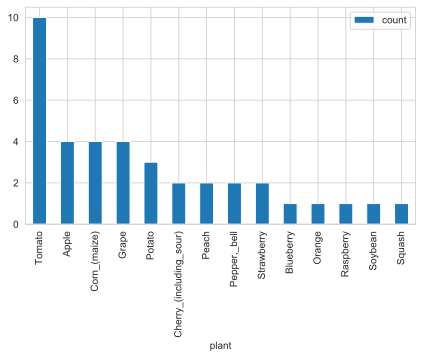

In [36]:
# mean number of tokens by category
plants_df.groupby(['plant']) \
  .agg({'count':'count'}) \
  .sort_values(by='count', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

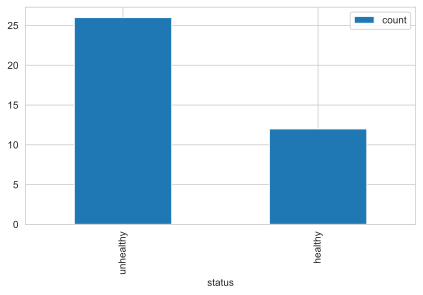

In [38]:
# mean number of tokens by category
plants_df.groupby(['status']) \
  .agg({'count':'count'}) \
  .sort_values(by='count', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

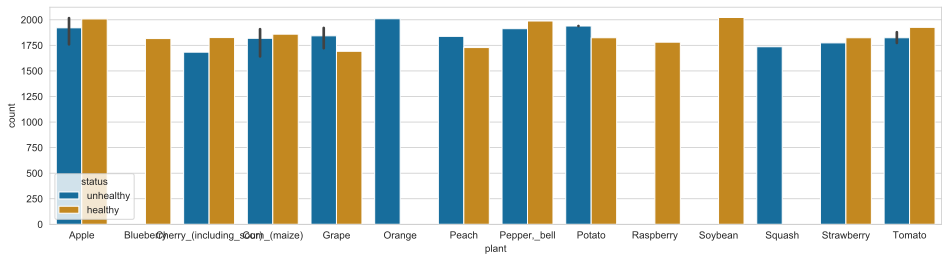

In [46]:
fig, (ax1) = plt.subplots(figsize=(16, 4), ncols=1, sharex=True)
#sns.boxplot(x='plant', y='count', data=plants_df, hue='status', ax=ax1);
#sns.stripplot(x='Model', y='F1_Score', data=cv_df, hue='Features', size=6, jitter=True, edgecolor="gray", linewidth=2, ax=ax1);
sns.barplot(y='count', x='plant', data=plants_df, palette="colorblind", hue='status', ax=ax1);